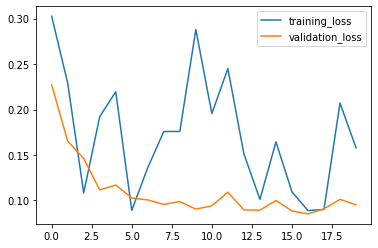

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


losses = pd.read_feather("../output/crop_from_gt/resnet.feather")

plt.plot(losses.index, losses["train_loss"], label="training_loss")
plt.plot(losses.index, losses["validation_loss"], label="validation_loss")
plt.legend()
plt.show()

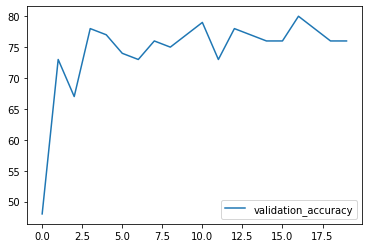

In [8]:
plt.figure()
plt.plot(losses.index, losses["validation_accuracy"], label="validation_accuracy")
plt.legend()
plt.show()